# Checking quality of the reads - Working with FASTQ files

Here, we will work with FASTQ files, the standard format output used by modern sequencers. You will learn how to work with quality scores per base.

### Data
This is a fairly small file (27 MB) and represents part of the sequenced
data of a Yoruban female (NA18489). If you refer to the 1,000 Genomes Project, you will see that the vast majority of FASTQ files are much bigger (up to two orders of magnitude bigger).
```
@SRR003258.1 30443AAXX:1:1:1053:1999 length=51 
ACCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCACACACACCAACAC
+
=IIIIIIIII5IIIIIII>IIII+GIIIIIIIIIIIIII(IIIII01&III```

Line 1 starts with @, followed by a sequence identifier and a description string. The description string will vary from a sequencer or a database source, but will normally be amenable to automated parsing.
The second line has the sequence DNA, which is just like a FASTA file. The third line is a +, sometimes followed by the description line on the first line.
The fourth line contains quality values for each base that's read on line two. Each letter encodes a Phred quality score, which assigns a probability of error to each read.

### Getting the data

In [1]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2021-11-28 20:12:06--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.197.77
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[===================>]  27,58M  8,26MB/s    in 3,3s    

2021-11-28 20:12:11 (8,26 MB/s) - ‘SRR003265.filt.fastq.gz’ saved [28919712]



### Reading FASTQ files

In [4]:
from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations) # quality scores of our reads, per letter

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


### PHRED QUALITY SCORES
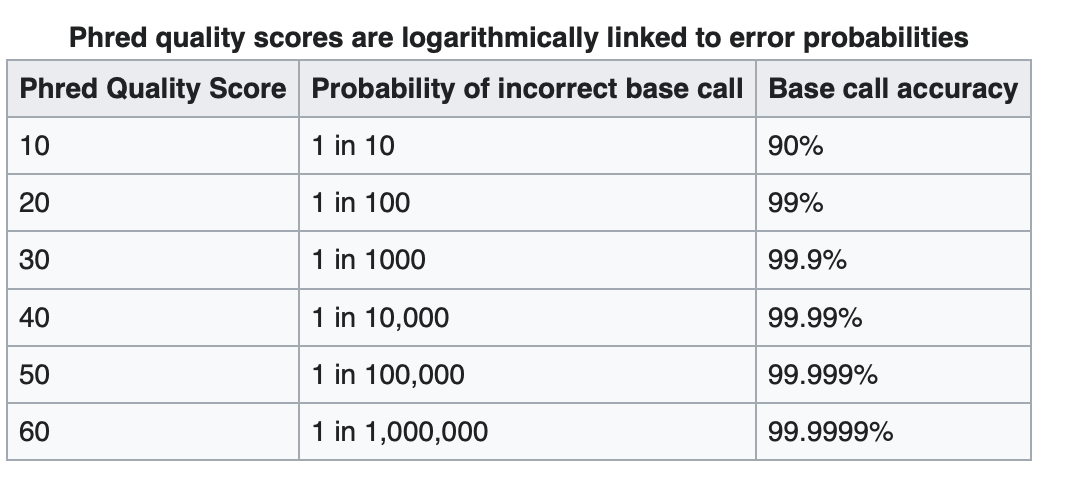

In [15]:
# NEVER DO THIS!
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
recs = list(recs)
recs

[SeqRecord(seq=Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA'), id='SRR003265.31', name='SRR003265.31', description='SRR003265.31 3042NAAXX:3:1:1252:1819 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GAAATTTGTTTGCAGACCTCTGTGCAAACAAATTTCAGATTGGAAGAGCGT'), id='SRR003265.216', name='SRR003265.216', description='SRR003265.216 3042NAAXX:3:1:433:1251 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GATAATGATCTGAAGTTTTATTTTTTCACCAGGTCTCTGCCACATTTTTGT'), id='SRR003265.404', name='SRR003265.404', description='SRR003265.404 3042NAAXX:3:1:1902:1672 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTTTTTTGTTGATTCTTTCAGATTTTCTACCTAGAGAATCACATCAACTG'), id='SRR003265.422', name='SRR003265.422', description='SRR003265.422 3042NAAXX:3:1:1903:2036 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTAGGGGGCATGTGAGGGAAGAGAATAAGAGACTGCCTGATAATTCAGGA'), id='SRR003265.542', name='SRR003265.542', description='SRR003265.542 3042NAAXX:3:1:1911:1074 length=51', dbxrefs=[]),
 SeqRecord(seq=Seq('GATTTGAGGCCAATCTTTG

### Distribution of nucleotide reads

In [8]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1
tot = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d' % (letter, 100. * count / tot, count))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


N - uncalled base

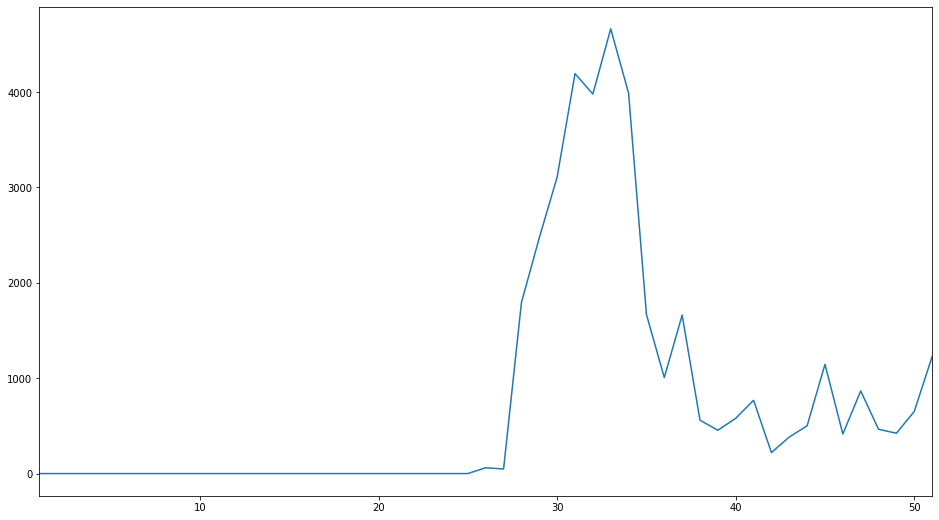

In [23]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)
pass

### Quality of reads

In [21]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


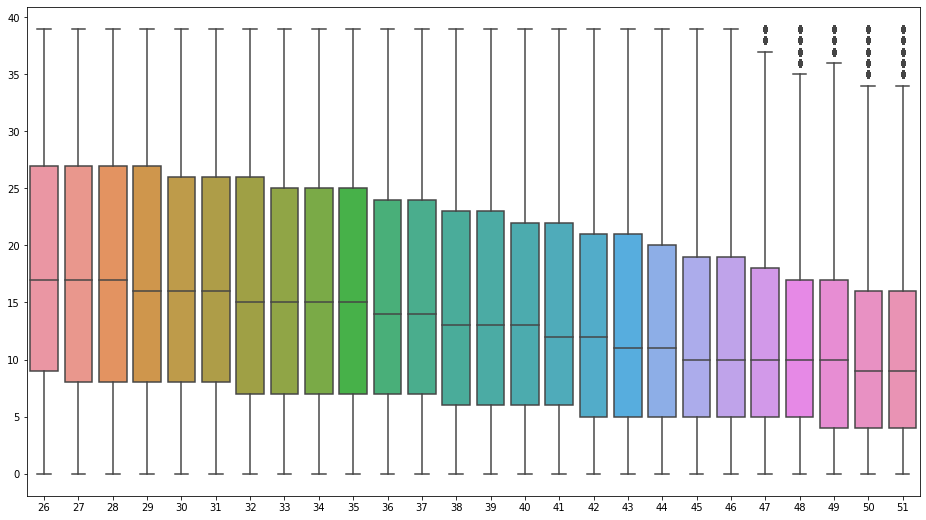

In [20]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass

**Want to learn more?**
Check Chapter 3 & 4 of Biopython tutorial to learn more about Sequence objects in Biopython.
Link: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf